## < save sinogram in .mha format >

In [33]:
import matplotlib.image
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np
import SimpleITK as sitk
import itk

#load csv file and save it as png file
sinogram = np.loadtxt('C:\\Users\\USER\\Desktop\\RP_lab\\XRF\\sinogram0514_Cylinder\\sinogram900.csv', delimiter=",", dtype=np.float32)

sinogram = np.where(sinogram < 0, 0, sinogram)


print("original sinogram shape : ", sinogram.shape)
sinogram_T = np.transpose(sinogram)
print("transposed sinogram shape : ", sinogram_T.shape)

matplotlib.image.imsave('sinogram900.png', sinogram, cmap='gray')
matplotlib.image.imsave('sinogram900_T.png', sinogram_T, cmap='gray')

sinogram_T = sinogram_T[:, np.newaxis, :]
print("transposed sinogram newaxis : ", sinogram_T.shape)
# print(sinogram_T)

sinogram_T = np.concatenate([sinogram_T, sinogram_T, sinogram_T], 1)
print("add two more rows : ", sinogram_T.shape)

proj2D_noset = sitk.GetImageFromArray(sinogram_T)

# sinogram_T[:, 0, :] = 1e10
# sinogram_T[:, 2, :] = 1e10

proj2D = sitk.GetImageFromArray(sinogram_T)
proj2D.SetSpacing([2, 2, 2])
proj2D.SetOrigin([-863, -2, -863])

# print(sinogram_T)

writer = sitk.ImageFileWriter()
writer.SetFileName('sinogram_T.mha')
writer.Execute(proj2D)

original sinogram shape :  (864, 361)
transposed sinogram shape :  (361, 864)
transposed sinogram newaxis :  (361, 1, 864)
add two more rows :  (361, 3, 864)


### 데이터 타입 확인

In [34]:
print(proj2D)

Image (00000248ACF60D30)
  RTTI typeinfo:   class itk::Image<float,3>
  Reference Count: 1
  Modified Time: 3526
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [864, 3, 361]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [864, 3, 361]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [864, 3, 361]
  Spacing: [2, 2, 2]
  Origin: [-863, -2, -863]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
2 0 0
0 2 0
0 0 2

  PointToIndexMatrix: 
0.5 0 0
0 0.5 0
0 0 0.5

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (00000248B51FF000)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,float>
      Reference Count: 1
      Modified Time: 3523

checking on sinogram.mha with itkwidgets

In [35]:
#itkwidgets
from itkwidgets import view
image = itk.imread("C:/Users/USER/Jupyter Notebook/ITK-RTK/sinogram_T.mha")
view(image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF3; proxy o…

## build geometry
rtksimulatedgeometry -n 361 -o geometry.xml --sid 500 --sdd 0

## after running rtkfdk with script
rtkfdk -p . -r sinogram_T.mha -o fdk.mha -g geometry.xml --spacing 2 --dimension 864,1,864

In [37]:
image = itk.imread("C:/itk/bin/bin/Debug/fdk.mha")
view(image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF3; proxy o…

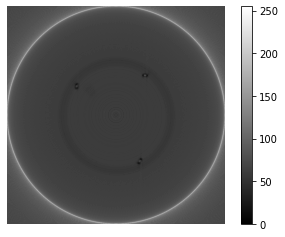

In [41]:
import SimpleITK as sitk
image = sitk.ReadImage("C:/itk/bin/bin/Debug/fdk.mha")
img_arr = sitk.GetArrayFromImage(image)
# print(img_arr, "\n")
# print(img_arr.shape)
# print(img_arr)
img_arr_sq = np.squeeze(img_arr, axis=1)
# print(img_arr_sq.shape)

img_arr_sq = img_arr_sq - np.min(img_arr_sq)
img_arr_sq /= np.max(img_arr_sq)
img_arr_sq = img_arr_sq * 255

plt.axis('off')
plt.imshow(img_arr_sq, cmap='gray')
plt.colorbar()